In [2]:
import os
import sys


project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)



import torch
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import wandb
from modules.utils import load_runs_final_artifact
from modules.models import TCN_channel, TCN, memory_polynomial_channel, GeneralizedMemoryPolynomial
from modules.utils import *
import pandas as pd
import seaborn as sns
import pickle
from matplotlib import cm
from scipy import stats
import zarr




DEVICE = torch.device("cpu")
print("DEVICE", DEVICE)
ENTITY = "dylanbackprops-university-of-washington"
PROJECT = "mldrivenpeled"

PLOT_PATH = os.path.join(project_root, "data/plots")

DEVICE cpu


In [ ]:
# Set plotting variables
PLOT_FONT_SIZE = 7
SMALL_PLOT_FONT_SIZE = 5
plt.rcParams.update({
    'font.size': PLOT_FONT_SIZE,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'axes.labelsize': PLOT_FONT_SIZE,
    'axes.titlesize': PLOT_FONT_SIZE,
    'xtick.labelsize': PLOT_FONT_SIZE,
    'ytick.labelsize': PLOT_FONT_SIZE,
    'legend.fontsize': PLOT_FONT_SIZE,
    'figure.dpi': 300,
    'lines.linewidth': 1.0,
    'lines.markersize': 4,
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'axes.linewidth': 0.8
    })

sns.set_style("whitegrid")

plt.rcParams.update({
    "axes.spines.top": True,
    "axes.spines.right": True,
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.edgecolor": "black",
    "axes.linewidth": 0.8,
})

# Setup for a Nature figure
mm_to_inches = 1 / 25.4
fig_width = 88 * mm_to_inches  # 3.46 inches
fig_height = 88 * mm_to_inches

# 2 column
double_fig_width = 180 * mm_to_inches
double_fig_height = 88 * mm_to_inches  # 3.46 inches



In [16]:

models = {
    "48mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-7.6MHz_2.68.V_0.125A_48mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "comfy-sweep-115",
        'encoder_decoder_tcn': "volcanic-galaxy-403",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'eager-grass-413',
        'grid_search':"yqzp2ezq",
        "tcn_validation": "fancy-plant-509",
        "mp_validation": "feasible-violet-510",
        "no_noise_tcn_validation": "copper-wave-644"
    },
    "60mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-9.2MHz_2.775.V_0.129A_60mA_scale2_dynamic_power_0.5-3.zarr", DEVICE),
        'tcn_channel': "happy-sweep-40",
        'encoder_decoder_tcn': "dazzling-wildflower-535",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'easy-yogurt-557',
        'grid_search':"jlwt6o4d",
        "tcn_validation": "stellar-water-768",
        "mp_validation": "proud-bird-769",
        "no_noise_tcn_validation":"northern-terrain-770"
    },
    "80mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-10.8MHz_2.834V_0.135A_80mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "classic-sweep-27",
        'encoder_decoder_tcn': "blooming-disco-648",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'cosmic-thunder-682',
        'grid_search':'mznst1h2',
        "tcn_validation": "lyric-haze-736",
        "mp_validation": "radiant-wood-740",
        "no_noise_tcn_validation":"radiant-dew-742"
    },
    "121mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-13MHz_2.934V_0.121A_121mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "rural-sweep-18",
        'encoder_decoder_tcn': "gentle-fog-741",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'giddy-fire-743',
        'grid_search':"tghclulb",
        "tcn_validation": "icy-snow-746",
        "mp_validation": "avid-water-751",
        "no_noise_tcn_validation":"happy-sun-757"
    },
}

wide_channel = {
        "wide channel 48mA": {
        'ofdm_info': extract_zarr_data( r"../data/channel_measurements/zarr_files/channel_3e5-15.2MHz_2.734V_0.126A_47mA_scale2_dynamic_power_0.5-3_v2.zarr", DEVICE),
        'tcn_channel': "fine-sweep-18",
        'encoder_decoder_tcn': "wobbly-jazz-801",
        'memory_polynomial':'blank',
        'encoder_decoder_mp':'deft-water-802',
        'grid_search':"bq7zffox",
        "tcn_validation": "lunar-glade-806",
        "mp_validation": "fiery-morning-810",
       "no_noise_tcn_validation": "vibrant-forest-811"
    }
}



c:\Users\maild\microled_project\prob_tcn_for_LED\modules\utils.py:74: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(cache_path, map_location=device)


Loaded from cache!
Loaded from cache!
Loaded from cache!
Loaded from cache!
Loaded from cache!


In [5]:
# Channel settings overview
for dc_bias, model_info in models.items():
    print(f"Training info at DC Bias {dc_bias}")
    ofdm_info = model_info['ofdm_info']
    sent_x = ofdm_info.sent_frames_time
    rec_y = ofdm_info.received_frames_time
    print(f"\tDataset shape {sent_x.shape}")
    print(f"\tNum subcarriers {len(ofdm_info.KS)}")
    print(f"\tMin Freq {ofdm_info.FREQUENCIES.min()}")
    print(f"\tMax Freq {ofdm_info.FREQUENCIES.max()}")

Training info at DC Bias 48mA
	Dataset shape torch.Size([5573, 8000])
	Num subcarriers 730
	Min Freq 300000
	Max Freq 7590000
Training info at DC Bias 60mA
	Dataset shape torch.Size([5395, 8000])
	Num subcarriers 890
	Min Freq 300000
	Max Freq 9190000
Training info at DC Bias 80mA
	Dataset shape torch.Size([4829, 8000])
	Num subcarriers 1050
	Min Freq 300000
	Max Freq 10790000
Training info at DC Bias 121mA
	Dataset shape torch.Size([4548, 8000])
	Num subcarriers 1270
	Min Freq 300000
	Max Freq 12990000


In [6]:
# Iterate over different current levels and fit memory polynomial models
for current_level, model_info in models.items():
    ofdm_info = model_info['ofdm_info']
    mp_model = memory_polynomial_channel(weights=None, memory_linear=9, memory_nonlinear=9, nonlinearity_order=2, device=torch.device('cpu'))
    _, _ , _ = mp_model.fit(ofdm_info.sent_frames_time, ofdm_info.received_frames_time)
    model_info['memory_polynomial'] = mp_model

for current_level, model_info in wide_channel.items():
    ofdm_info = model_info['ofdm_info']
    mp_model = memory_polynomial_channel(weights=None, memory_linear=9, memory_nonlinear=9, nonlinearity_order=2, device=torch.device('cpu'))
    _, _ , _ = mp_model.fit(ofdm_info.sent_frames_time, ofdm_info.received_frames_time)
    model_info['memory_polynomial'] = mp_model

# Iterate over different current levels and fit memory polynomial models
for current_level, model_info in models.items():
    ofdm_info = model_info['ofdm_info']
    gmp_model = GeneralizedMemoryPolynomial(weights=None, memory_linear=9, memory_nonlinear=9, nonlinearity_order=2, cross_term_depth=2, device=torch.device('cpu'))
    _, _ , _ = gmp_model.fit(ofdm_info.sent_frames_time, ofdm_info.received_frames_time)
    model_info['general_memory_polynomial'] = gmp_model

In [7]:
mp_test = models['48mA']['general_memory_polynomial']
ofdm_info = models['48mA']['ofdm_info']
X, Y = ofdm_info.sent_frames_time, ofdm_info.received_frames_time
_, _ = mp_test.calculate_err(X, Y, plot=True)

--------------------------------------------------
Rank  | Term String          | ERR (%)        
--------------------------------------------------
1     | x[0]                 | 47.562574%
2     | x[-1]                | 20.111328%
3     | x[-2]                | 10.758871%
4     | x[-3]                | 4.125870%
5     | x[-4]                | 2.426910%
6     | x[0]^2               | 1.962576%
7     | x[-5]                | 1.577888%
8     | x[-6]                | 1.142131%
9     | x[-1]^2              | 0.950098%
10    | x[-7]                | 0.782831%
11    | x[-4]^2              | 0.575670%
12    | x[-5]^2              | 0.556022%
13    | x[-8]                | 0.484659%
14    | x[0] * x[-1]^1       | 0.457841%
15    | x[-6]^2              | 0.390382%
16    | x[-9]                | 0.326346%
17    | x[0] * x[-2]^1       | 0.254866%
18    | x[-3]^2              | 0.246386%
19    | x[-7]^2              | 0.219187%
20    | x[-1] * x[-3]^1      | 0.217338%
21    | x[-8]^2             

In [8]:
mp_test = models['48mA']['memory_polynomial']
print(mp_test)
ofdm_info = models['48mA']['ofdm_info']
X, Y = ofdm_info.sent_frames_time, ofdm_info.received_frames_time
_, _ = mp_test.calculate_err(X, Y, plot=True)

memory_polynomial_channel()
--------------------------------------------------
Rank  | Term String          | ERR (%)        
--------------------------------------------------
1     | x[0]                 | 47.562574%
2     | x[-1]                | 20.111328%
3     | x[-2]                | 10.758871%
4     | x[-3]                | 4.125870%
5     | x[-4]                | 2.426910%
6     | x[0]^2               | 1.962576%
7     | x[-5]                | 1.577888%
8     | x[-6]                | 1.142131%
9     | x[-1]^2              | 0.950098%
10    | x[-7]                | 0.782831%
11    | x[-4]^2              | 0.575670%
12    | x[-5]^2              | 0.556022%
13    | x[-8]                | 0.484659%
14    | x[-6]^2              | 0.390382%
15    | x[-9]                | 0.326346%
16    | x[-3]^2              | 0.246386%
17    | x[-7]^2              | 0.219187%
18    | x[-8]^2              | 0.146654%
19    | x[-9]^2              | 0.105139%
20    | x[-2]^2              | 0.097547%


In [9]:
# # fit a much large MP model at 48 mA
# mp_large = memory_polynomial_channel(weights=None, memory_linear=30, memory_nonlinear=30, nonlinearity_order=2, device=torch.device('cpu'))
# ofdm_info = models['48mA']['ofdm_info']
# X, Y = ofdm_info.sent_frames_time, ofdm_info.received_frames_time
# _, _ , _ = mp_large.fit(X, Y)
# _, _ = mp_large.calculate_err(X, Y, plot=True)

Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth
Total RRMSE calculation for current level: 48mA


c:\Users\maild\microled_project\prob_tcn_for_LED\modules\utils.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(local_weights_path, map_location="c

	TCN RRMSE: 11.6776 %
	MP RRMSE: 23.3503 %
	GMP RRMSE: 20.0983 %
Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Total RRMSE calculation for current level: 60mA
	TCN RRMSE: 8.9750 %
	MP RRMSE: 16.9870 %
	GMP RRMSE: 14.5071 %
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Total RRMSE calculation for current level: 80mA
	TCN RRMSE: 9.1459 %
	MP RRMSE: 14.1834 %
	GMP RRMSE: 12.4541 %
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth
Total RRMSE calculation for current level: 121mA
	TCN RRMSE: 9.8824 %
	MP RRMSE: 12.3591 %
	GMP RRMSE: 11.8334 %


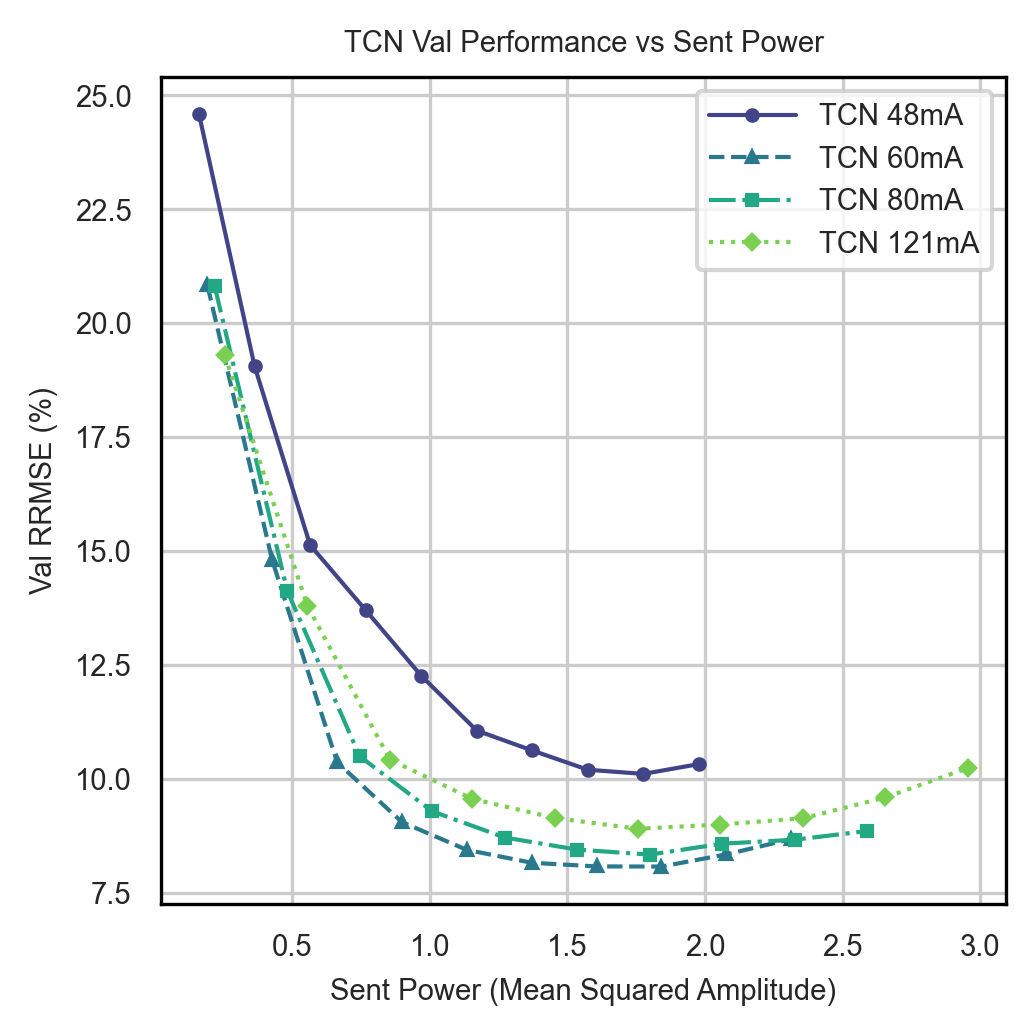

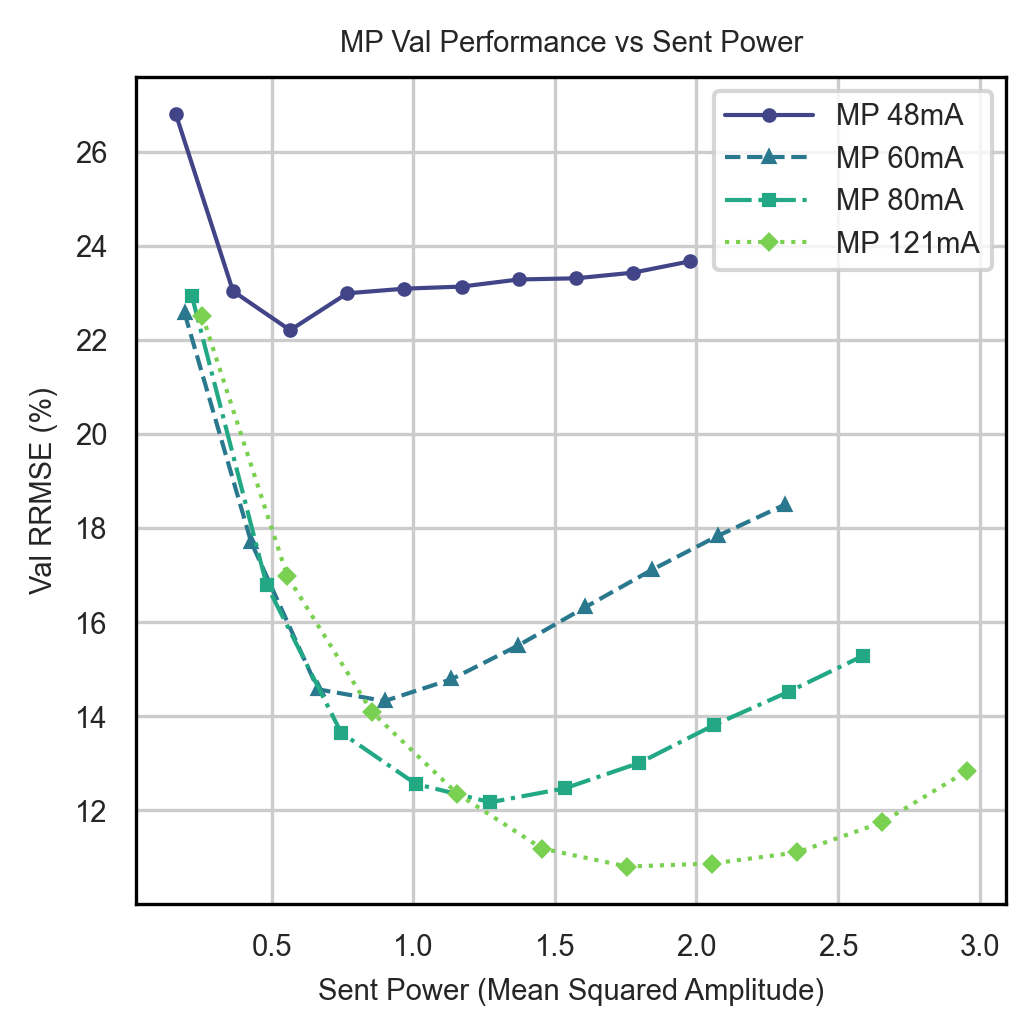

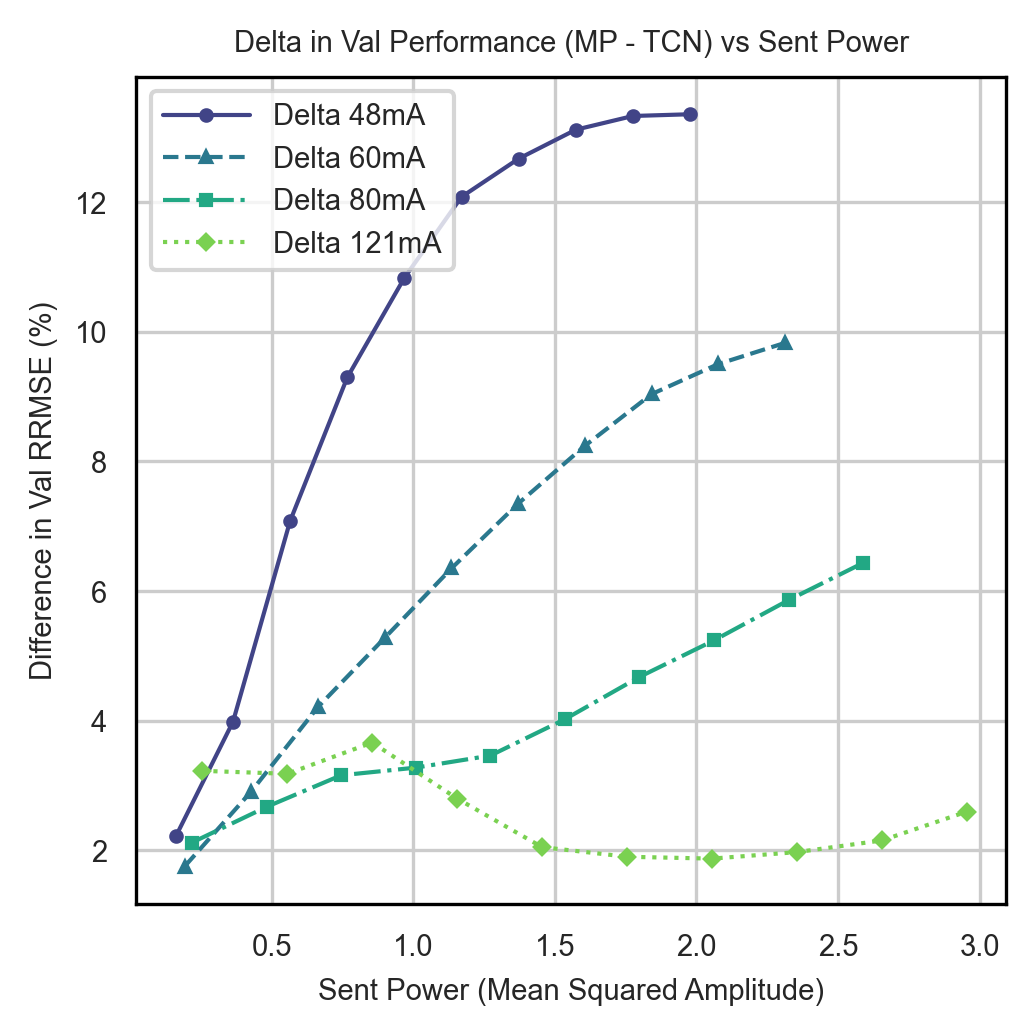

In [10]:
plt.rcParams.update({'figure.dpi': 300})

current_levels = list(models.keys())
markers = ['o', '^', 's', 'D', 'p']
line_styles = ['-', '--', '-.', ':', '-']
num_levels = len(current_levels)
color_palette = sns.color_palette("viridis", num_levels)

all_results = {}
N = 10

for current_level, model_info in models.items():
    ofdm_info = model_info['ofdm_info']
    X = ofdm_info.sent_frames_time.to(DEVICE)
    Y = ofdm_info.received_frames_time.to(DEVICE)
    mp_model = model_info['memory_polynomial']
    gmp_model = model_info['general_memory_polynomial']
    tcn_model, tcn_cfg = load_runs_final_artifact(model_info['tcn_channel'], DEVICE, model_type='channel')

    sent_powers = X.square().mean(dim=-1).to(torch.float64) # Ensure float64 for precision
    pwr_min, pwr_max = sent_powers.min(), sent_powers.max()
    bins = torch.linspace(pwr_min, pwr_max, N + 1)
    bin_ids = torch.bucketize(sent_powers, bins)

    binned_losses = torch.zeros(N, 3)

    print("Total RRMSE calculation for current level:", current_level)
    tcn_rrmse_loss = calculate_rrmse_pct_loss(Y, tcn_model(X)[1])
    mp_rrmse_loss = calculate_rrmse_pct_loss(Y, mp_model(X))
    gmp_rrmse_loss = calculate_rrmse_pct_loss(Y, gmp_model(X))
    print(f"\tTCN RRMSE: {tcn_rrmse_loss:.4f} %")
    print(f"\tMP RRMSE: {mp_rrmse_loss:.4f} %")
    print(f"\tGMP RRMSE: {gmp_rrmse_loss:.4f} %")


    for i in range(N):
        mask = bin_ids == i
        if mask.any():
            filtered_x, filtered_y = X[mask], Y[mask]
            _, y_pred_tcn, _, _ = tcn_model(filtered_x)
            mp_y_pred = mp_model(filtered_x)
            binned_losses[i, 0] = calculate_rrmse_pct_loss(filtered_y, y_pred_tcn)
            binned_losses[i, 1] = calculate_rrmse_pct_loss(filtered_y, mp_y_pred)
            binned_losses[i, 2] = calculate_rrmse_pct_loss(filtered_y, gmp_model(filtered_x))
        else:
            binned_losses[i, :] = torch.nan

    all_results[current_level] = {
        'bin_centers': 0.5 * (bins[:-1] + bins[1:]),
        'losses': binned_losses
    }

plt.figure(figsize=(fig_width, fig_height))
for (current_level, data), marker, line_style in zip(all_results.items(), markers, line_styles):
    plt.plot(data['bin_centers'].cpu(), data['losses'][:, 0].cpu(), color=color_palette[current_levels.index(current_level)], marker=marker, linestyle=line_style, markersize=2.5, label=f'TCN {current_level}')
plt.title("TCN Val Performance vs Sent Power")
plt.xlabel("Sent Power (Mean Squared Amplitude)")
plt.ylabel("Val RRMSE (%)")
plt.legend(fontsize=PLOT_FONT_SIZE, handlelength = 3, labelspacing=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(
    os.path.join(PLOT_PATH, "rrmse_tcn.svg"),
    format='svg',
    bbox_inches='tight'
)

plt.show()


plt.figure(figsize=(fig_width, fig_height))
for (current_level, data), marker, line_style in zip(all_results.items(), markers, line_styles):
    plt.plot(data['bin_centers'].cpu(), data['losses'][:, 1].cpu(), color=color_palette[current_levels.index(current_level)], marker=marker, linestyle=line_style, markersize=2.5, label=f'MP {current_level}')
plt.title("MP Val Performance vs Sent Power")
plt.xlabel("Sent Power (Mean Squared Amplitude)")
plt.ylabel("Val RRMSE (%)")
plt.legend(fontsize=PLOT_FONT_SIZE, handlelength = 3, labelspacing=0.5)
plt.tight_layout()
plt.grid(True)


plt.savefig(
    os.path.join(PLOT_PATH, "rrmse_mp.svg"),
    format='svg',
    bbox_inches='tight'
)

plt.show()

plt.figure(figsize=(fig_width, fig_height))
for (current_level, data), marker, line_style in zip(all_results.items(), markers, line_styles):
    delta = data['losses'][:, 1] - data['losses'][:, 0]
    plt.plot(data['bin_centers'].cpu(), delta.cpu(), color=color_palette[current_levels.index(current_level)], marker=marker, linestyle=line_style, markersize=2.5, label=f'Delta {current_level}')
plt.title("Delta in Val Performance (MP - TCN) vs Sent Power")
plt.xlabel("Sent Power (Mean Squared Amplitude)")
plt.ylabel("Difference in Val RRMSE (%)")
plt.legend(fontsize=PLOT_FONT_SIZE, handlelength = 3, labelspacing=0.5)
plt.tight_layout()
plt.grid(True)


plt.savefig(
    os.path.join(PLOT_PATH, "rrmse_delta.svg"),
    format='svg',
    bbox_inches='tight'
)
plt.show()

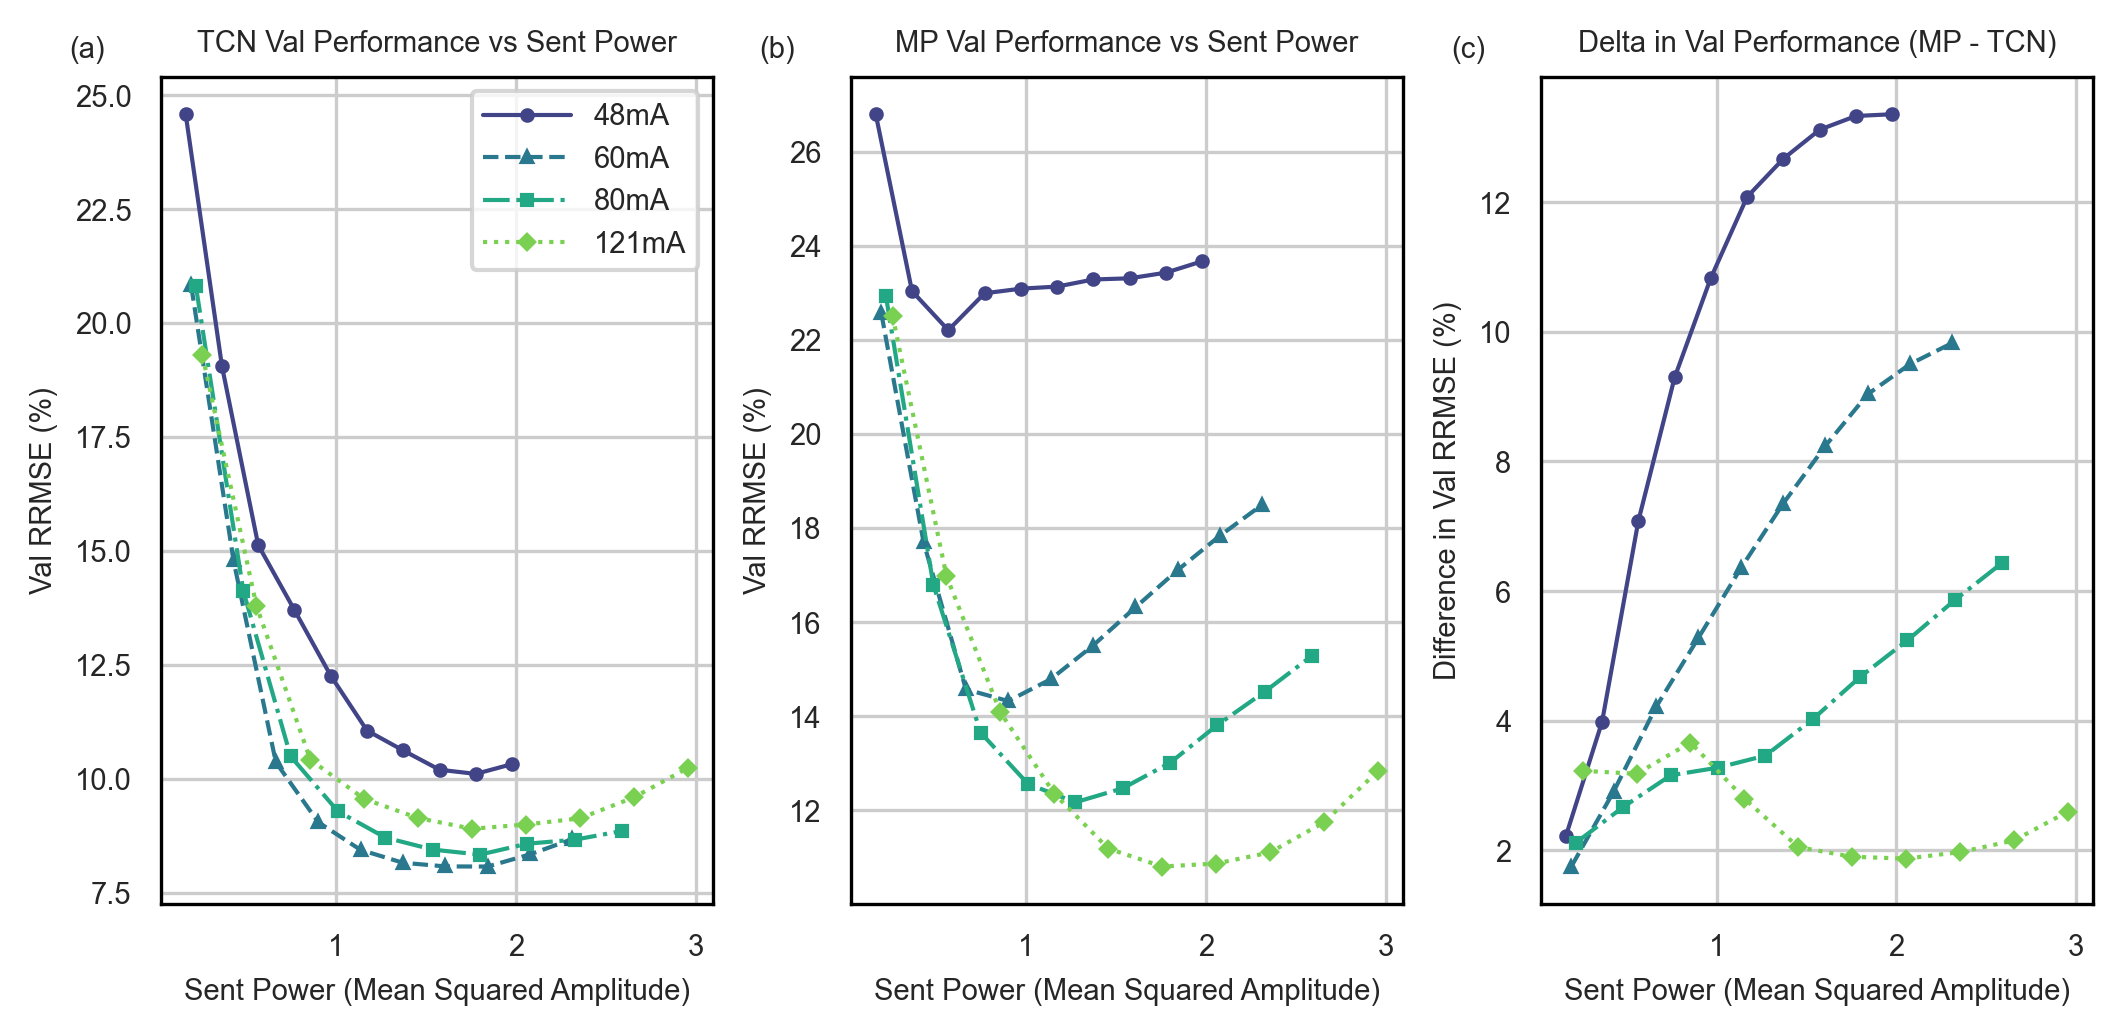

In [14]:
# Create one figure with 3 subplots in a single row
fig, axes = plt.subplots(1, 3, figsize=(double_fig_width, fig_height), sharey=False)


plot_titles = [
    "TCN Val Performance vs Sent Power", 
    "MP Val Performance vs Sent Power", 
    "Delta in Val Performance (MP - TCN)"
]
y_labels = ["Val RRMSE (%)", "Val RRMSE (%)", "Difference in Val RRMSE (%)"]

for (current_level, data), marker, line_style in zip(all_results.items(), markers, line_styles):
    color = color_palette[current_levels.index(current_level)]
    bin_centers = data['bin_centers'].cpu()
    losses = data['losses'].cpu()
    
    # Plot TCN
    axes[0].plot(bin_centers, losses[:, 0], color=color, marker=marker, 
                 linestyle=line_style, markersize=2.5, label=f'{current_level}')
    
    # Plot MP
    axes[1].plot(bin_centers, losses[:, 1], color=color, marker=marker, 
                 linestyle=line_style, markersize=2.5)
    
    # Plot Delta (MP - TCN)
    delta = losses[:, 1] - losses[:, 0]
    axes[2].plot(bin_centers, delta, color=color, marker=marker, 
                 linestyle=line_style, markersize=2.5)

# Formatting all subplots
for i, ax in enumerate(axes):
    ax.set_title(plot_titles[i], fontsize=PLOT_FONT_SIZE)
    ax.set_xlabel("Sent Power (Mean Squared Amplitude)")
    ax.set_ylabel(y_labels[i])
    ax.grid(True)
    if i == 0: # Add single legend to the first plot to save space
        ax.legend(fontsize=PLOT_FONT_SIZE, handlelength=3, labelspacing=0.5)

# Add subplot labels (a, b, c)
for i, ax in enumerate(axes):
    ax.text(-0.1, 1.05, f"({chr(97 + i)})", transform=ax.transAxes,
            fontsize=PLOT_FONT_SIZE, va='top', ha='right')

plt.tight_layout()

# Save as a single combined SVG
plt.savefig(
    os.path.join(PLOT_PATH, "combined_rrmse_metrics.svg"),
    format='svg',
    bbox_inches='tight'
)
plt.show()

In [ ]:
plt.figure(figsize=(fig_width, fig_height))
for (current_level, data), marker, line_style in zip(all_results.items(), markers, line_styles):
    plt.plot(data['bin_centers'].cpu(), data['losses'][:, 1].cpu(), color=color_palette[current_levels.index(current_level)], marker=marker, linestyle=':', markersize=2.5, label=f'MP {current_level}')
    plt.plot(data['bin_centers'].cpu(), data['losses'][:, 2].cpu(), color=color_palette[current_levels.index(current_level)], marker=marker, linestyle='-', markersize=2.5, label=f'GMP {current_level}')
plt.title("GMP and MP Val Performance vs Sent Power")
plt.xlabel("Sent Power (Mean Squared Amplitude)")
plt.ylabel("Val RRMSE (%)")
plt.legend(fontsize=PLOT_FONT_SIZE, handlelength = 3, labelspacing=0.5)
plt.grid(True)
plt.tight_layout()

plt.savefig(
    os.path.join(PLOT_PATH, "rrmse_gmp.svg"),
    format='svg',
    bbox_inches='tight'
)

plt.show()

Loading from cache!


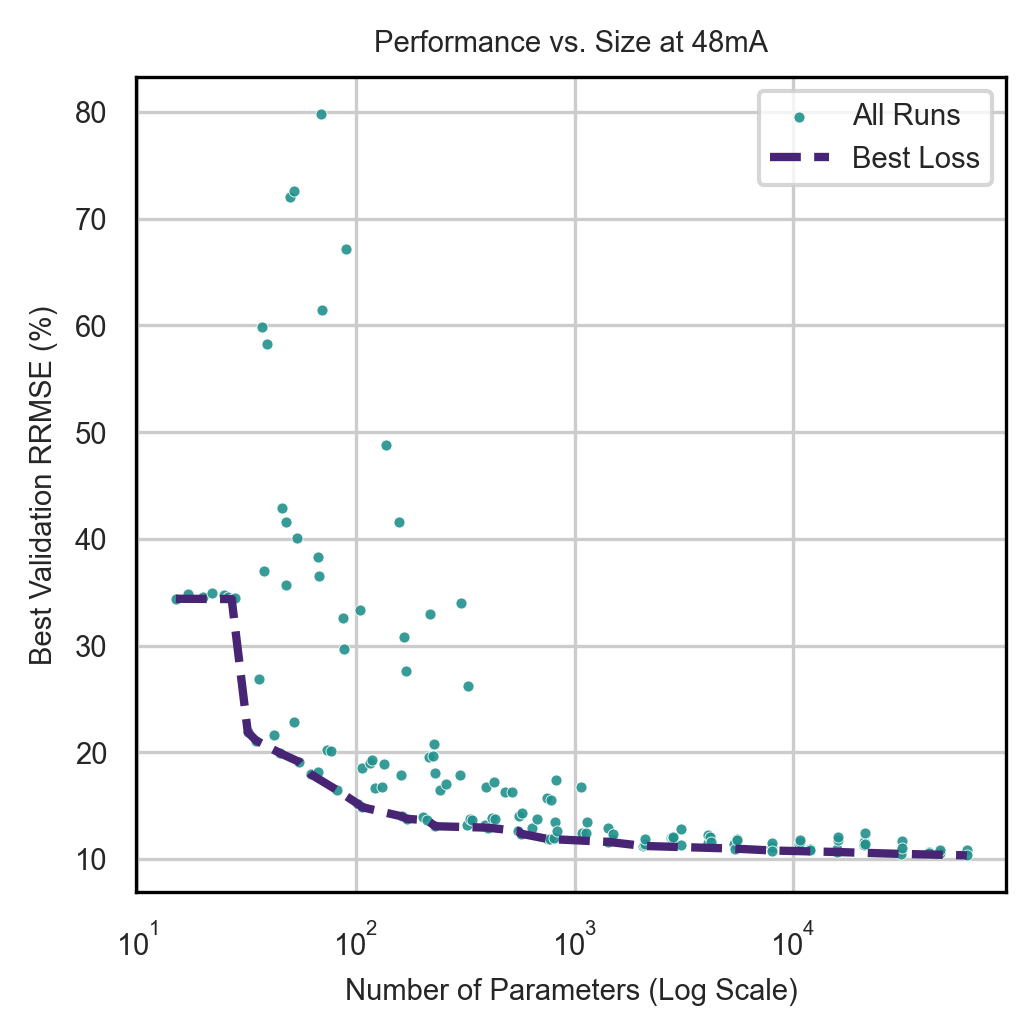

In [ ]:
#Get Models for a Sweep and Plot Best Val NMRSE loss vs parameter count
cmap = plt.get_cmap("viridis")
c_runs  = cmap(0.5)
c_best = cmap(0.1)

def plot_sweep_pareto(sweep_id, entity, project):
    """
    Fetches all runs from a W&B sweep and plots Best Val NRMSE vs Parameter Count.

    Args:
        sweep_id (str): The ID of the sweep.
        entity (str): Your W&B username or team name.
        project (str): The project name.
    """

    # Check if sweep id is cached in plot data
    cache_file = f"cache_{sweep_id}.pkl"
    cache_path = os.path.join(project_root, f"data/plots/{cache_file}")
    if os.path.exists(cache_path):
        print("Loading from cache!")
        with open(cache_path, 'rb') as f:
            sweep_data = pickle.load(f)

    else:
        print("Getting from API")

        api = wandb.Api()

        path = f"{entity}/{project}/{sweep_id}"
        sweep = api.sweep(path)

        # save in pickle file
        os.makedirs(os.path.dirname(cache_path), exist_ok=True)
        sweep_data = []

        for run in sweep.runs:
            # Skip failed/crashed runs
            if run.state != "finished":
                continue
            num_params = run.config.get('num_params')

            val_nrmse = run.summary.get('avg_nrmse_pct_loss')

            sweep_data.append({
                "params": num_params,
                "nrmse_pct": val_nrmse,
                "run_name": run.name
            })

        with open(cache_path, 'wb') as f:
            pickle.dump(sweep_data, f)

    df = pd.DataFrame(sweep_data)

    df = df.sort_values("params")

    pareto_points = []
    current_min_error = float('inf')

    for _, row in df.iterrows():
        if row['nrmse_pct'] < current_min_error:
            pareto_points.append(row)
            current_min_error = row['nrmse_pct']

    pareto_df = pd.DataFrame(pareto_points)

    plt.figure(figsize=(fig_width, fig_height))

    # Scatter all runs
    sns.scatterplot(
        data=df,
        x='params',
        y='nrmse_pct',
        s=7,
        alpha=0.9,
        color=c_runs,
        label='All Runs'
    )

    # Draw Pareto Line
    plt.plot(
        pareto_df['params'],
        pareto_df['nrmse_pct'],
        linestyle='--',
        linewidth=2,
        label='Best Loss',
        color=c_best
    )

    plt.xscale('log')
    plt.xlabel('Number of Parameters (Log Scale)')
    plt.ylabel('Best Validation RRMSE (%)')
    plt.title(f'Performance vs. Size at {DC_BIAS}')
    plt.legend(loc='upper right')



for dc in ['48mA', '60mA', '80mA', '121mA']:


    SWEEP_ID = models[dc]['grid_search']

    plot_sweep_pareto(SWEEP_ID, entity=ENTITY, project=PROJECT)
    plt.tight_layout()
    plt.savefig(
        os.path.join(PLOT_PATH, "performance_vs_size.svg"),
        format='svg',
        bbox_inches='tight',
        transparent=True
    )
    plt.show()


Loading EVM losses for 48mA from cache...
Loading EVM losses for 60mA from cache...
Loading EVM losses for 80mA from cache...
Loading EVM losses for 121mA from cache...


C:\Users\maild\AppData\Local\Temp\ipykernel_24668\4170892036.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cached = torch.load(cache_path, map_location=DEVICE)


Loading from ../models\encoder_decoders\volcanic-galaxy-403\time_autoencoder.pth
Loading from ../models\encoder_decoders\eager-grass-413\time_autoencoder.pth
Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth


c:\Users\maild\mldrivenpeled\modules\utils.py:407: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(local_weights_path, map_location="cpu")


Loading from ../models\encoder_decoders\dazzling-wildflower-535\time_autoencoder.pth
Loading from ../models\encoder_decoders\easy-yogurt-557\time_autoencoder.pth
Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Loading from ../models\encoder_decoders\blooming-disco-648\time_autoencoder.pth
Loading from ../models\encoder_decoders\cosmic-thunder-682\time_autoencoder.pth
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Loading from ../models\encoder_decoders\gentle-fog-741\time_autoencoder.pth
Loading from ../models\encoder_decoders\giddy-fire-743\time_autoencoder.pth
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth


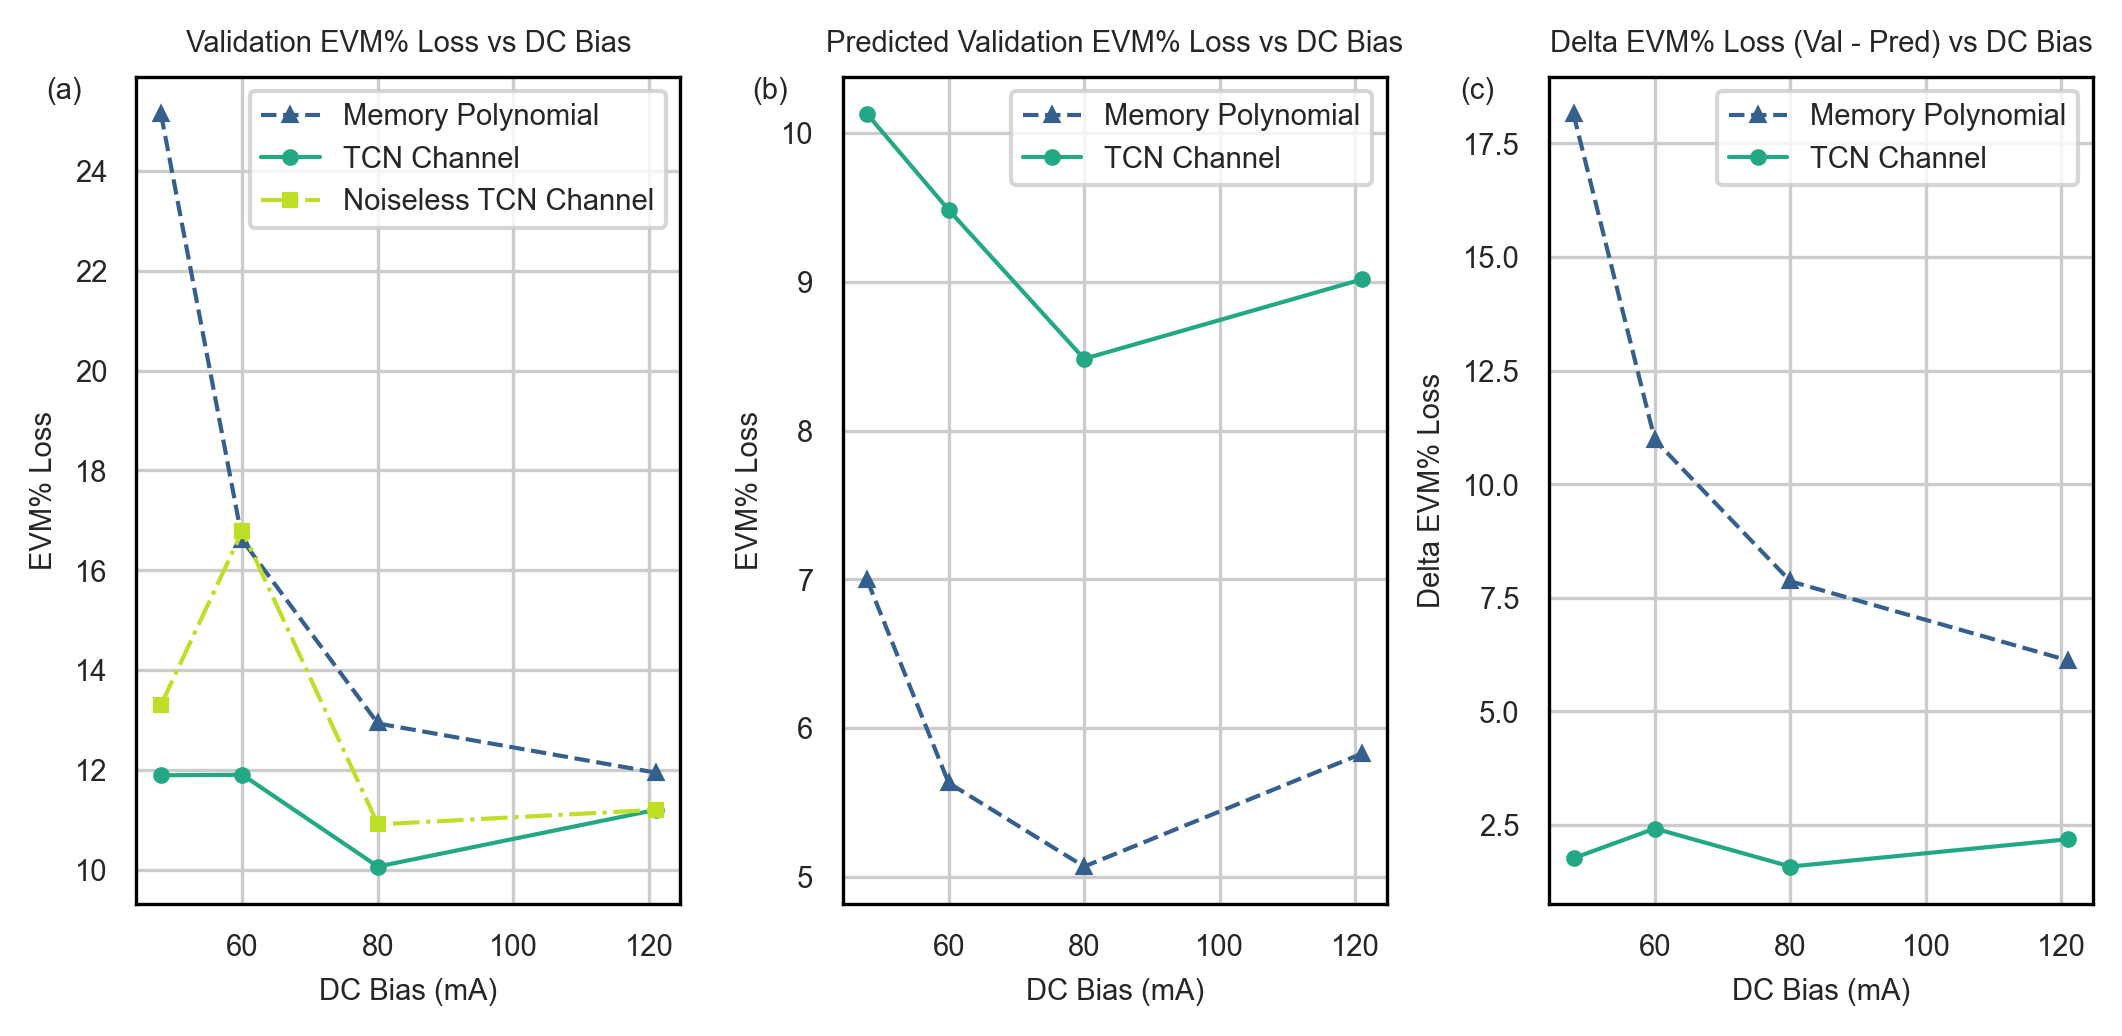

DC Bias 48mA
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
DC Bias 60mA
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
DC Bias 80mA
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00
	BER:  0.0000000000000000e+00


In [12]:
# Analyze Experimental Validation Data

from scipy.fft import rfft
from lab_scripts.constellation_diagram import get_constellation


def calculate_evm_loss(sent_frames_time, decoded_frames_time, val_ofdm_settings, KS):
    sent_frames_frequency = torch.tensor(rfft(sent_frames_time[:, val_ofdm_settings.CP_LENGTH:].numpy(), norm='ortho', axis=1)[:, KS])
    decoded_frames_frequency = torch.tensor(rfft(decoded_frames_time[:, val_ofdm_settings.CP_LENGTH:].numpy(), norm='ortho', axis=1)[:, KS])
    diff_complex = sent_frames_frequency - decoded_frames_frequency
    evm_loss = torch.sqrt(torch.sum(diff_complex.abs().pow(2)) / torch.sum(sent_frames_frequency.abs().pow(2))) * 100 # EVM in percentage
    return evm_loss.item()


root_val_path = os.path.join(project_root, "data/validation_measurements")
dc_offsets= [int(bias[:-2]) for bias in models.keys()]

no_noise_tcn_evms = []


fig, axs = plt.subplots(1, 3, figsize=(double_fig_width, double_fig_height))

cmap = plt.get_cmap("viridis")
c_mp  = cmap(0.3)
c_tcn = cmap(0.6)
c_noiseless = cmap(0.9)
val_tcn_evms = []
val_mp_evms = []


def extract_val_evm_losses(dc_bias, vals, models, root_val_path, DEVICE):
    ofdm_info = models[dc_bias]['ofdm_info']
    KS = ofdm_info.KS
    cache_path = os.path.join(root_val_path, f"{dc_bias}_val_cache.pt")
    if os.path.exists(cache_path):
        print(f"Loading EVM losses for {dc_bias} from cache...")
        cached = torch.load(cache_path, map_location=DEVICE)
        evm_vals = cached["evm"]
        ber_vals = cached["ber"]
        return tuple(evm_vals[v] for v in vals) + tuple(ber_vals[v] for v in vals)
    print("No cache found, computing EVM losses and caching...")

    evm_vals = dict()
    ber_vals = dict()
    for val in vals:
        val_path = os.path.join(root_val_path, f'{models[dc_bias][val]}.zarr')
        root = zarr.open(val_path, mode="r")
        evms = []
        bers = []
        for frame_key in root.group_keys():
            try:
                frame = root[frame_key]
                sent_frame_time = torch.tensor(frame['time_encoder_in'][:], device=DEVICE)
                received_frame_time = torch.tensor(frame['time_decoder_out'][:], device=DEVICE)
                evm = calculate_evm_loss(sent_frame_time, received_frame_time, ofdm_info, KS)
                evms.append(evm)
                ber = frame.attrs.get('BER')
                bers.append(ber)
            except Exception as e:
                print(f"Skipping corrupted frame {frame_key}: {e}")
                pass # skip corrupted frames
        evm_vals[val] = sum(evms) / len(evms) if evms else float('nan')
        ber_vals[val] = sum(bers) / len(bers)
    torch.save(
        {"evm": evm_vals, "ber": ber_vals},
        cache_path
    )
    return tuple(evm_vals.values()) + tuple(ber_vals.values())

root_val_path = os.path.join(project_root, "data/validation_measurements")
vals = ['mp_validation', 'tcn_validation', 'no_noise_tcn_validation']

val_tcn_evms = []
val_mp_evms = []
no_noise_tcn_evms = []
val_mp_bers = []
val_tcn_bers = []
no_noise_tcn_bers = []

for dc_bias in models.keys():
    val_mp_evm, val_tcn_evm, no_noise_tcn_evm, val_mp_ber, val_tcn_ber, no_noise_tcn_ber = extract_val_evm_losses(dc_bias, vals, models, root_val_path, DEVICE)
    val_tcn_evms.append(val_tcn_evm)
    val_mp_evms.append(val_mp_evm)
    no_noise_tcn_evms.append(no_noise_tcn_evm)
    val_mp_bers.append(val_mp_ber)
    val_tcn_bers.append(val_tcn_ber)
    no_noise_tcn_bers.append(no_noise_tcn_ber)

axs[0].plot(dc_offsets, val_mp_evms, marker='^', linestyle='--', color=c_mp, label='Memory Polynomial', markersize=3)
axs[0].plot(dc_offsets, val_tcn_evms, marker='o', linestyle='-', color=c_tcn, label='TCN Channel', markersize=3)
axs[0].plot(dc_offsets, no_noise_tcn_evms, marker='s', linestyle='-.', color=c_noiseless, label='Noiseless TCN Channel', markersize=3)
axs[0].set_title(r"Validation EVM% Loss vs DC Bias")
axs[0].set_xlabel("DC Bias (mA)")
axs[0].set_ylabel(r"EVM% Loss")
axs[0].legend()

pred_tcn_evms = []
pred_mp_evms = []

PREAMBLE_MAX = 3
# Get predicted performances using the encoder-decoder models
for dc_bias in models.keys():
    ofdm_info = models[dc_bias]['ofdm_info']
    X = ofdm_info.sent_frames_time.to(DEVICE)
    KS = ofdm_info.KS

    constellation_mode = "qpsk"
    constellation = get_constellation(constellation_mode)
    NUM_BITS = len(KS) * 2 # qpsk
    # Get subset for faster evaluation
    symbols = []
    num_symbols = 500
    for batch in range(num_symbols):
        # Generate frame data
        true_bits = np.random.randint(0, 2, size=NUM_BITS)
        true_bits_str = ''.join(map(str, true_bits))
        true_symbols = torch.tensor(
            constellation.bits_to_symbols(true_bits_str),
            dtype=torch.complex64, device=DEVICE
        )
        true_frame = true_symbols.reshape(1, len(KS))


        symbols.append(true_frame)
    symbols = torch.cat(symbols, dim=0)
    sent_frames_time = symbols_to_time(symbols, ofdm_info.LEFT_PADDING_ZEROS, ofdm_info.RIGHT_PADDING_ZEROS)
    X = torch.hstack((sent_frames_time[:, -ofdm_info.CP_LENGTH:], sent_frames_time))
    tcn_enc, tcn_dec, tcn_cfg = load_runs_final_artifact(models[dc_bias]['encoder_decoder_tcn'], DEVICE, model_type='encoder_decoder')
    mp_enc, mp_dec, mp_cfg = load_runs_final_artifact(models[dc_bias]['encoder_decoder_mp'], DEVICE, model_type='encoder_decoder')
    channel_model_tcn, _ = load_runs_final_artifact(models[dc_bias]['tcn_channel'], DEVICE, model_type='channel')
    channel_model_mp = models[dc_bias]['memory_polynomial']
    with torch.no_grad():
        enc_out_tcn= tcn_enc(X)
        enc_out_tcn = torch.clip(enc_out_tcn, -PREAMBLE_MAX, PREAMBLE_MAX)
        rec_tcn, _, _, _ = channel_model_tcn(enc_out_tcn)
        y_pred_tcn = tcn_dec(rec_tcn)

        enc_out_mp= mp_enc(X)
        enc_out_mp = torch.clip(enc_out_mp, -PREAMBLE_MAX, PREAMBLE_MAX)
        rec_mp= channel_model_mp(enc_out_mp)
        y_pred_mp = mp_dec(rec_mp)

    tcn_evm = calculate_evm_loss(X, y_pred_tcn, ofdm_info, KS)
    mp_evm = calculate_evm_loss(X, y_pred_mp, ofdm_info, KS)

    pred_tcn_evms.append(tcn_evm)
    pred_mp_evms.append(mp_evm)


axs[1].plot(dc_offsets, pred_mp_evms, marker='^', linestyle='--', color=c_mp, label='Memory Polynomial', markersize=3)
axs[1].plot(dc_offsets, pred_tcn_evms, marker='o', linestyle='-', color=c_tcn, label='TCN Channel', markersize=3)
axs[1].set_title(r"Predicted Validation EVM% Loss vs DC Bias")
axs[1].set_xlabel("DC Bias (mA)")
axs[1].set_ylabel(r"EVM% Loss")
axs[1].legend()

# Plot Delta Performance
val_minus_pred_tcn_evms = [val - pred for val, pred in zip(val_tcn_evms, pred_tcn_evms)]
val_minus_pred_mp_evms = [val - pred for val, pred in zip(val_mp_evms, pred_mp_evms)]
axs[2].plot(dc_offsets, val_minus_pred_mp_evms, marker='^', linestyle='--', color=c_mp, label='Memory Polynomial', markersize=3)
axs[2].plot(dc_offsets, val_minus_pred_tcn_evms, marker='o', linestyle='-', color=c_tcn, label='TCN Channel', markersize=3)
axs[2].set_title(r"Delta EVM% Loss (Val - Pred) vs DC Bias")
axs[2].set_xlabel("DC Bias (mA)")
axs[2].set_ylabel(r"Delta EVM% Loss")
axs[2].legend()

# Add subplot labels (a, b, c)
for i, ax in enumerate(axs):
    ax.text(-0.1, 1, f"({chr(97 + i)})", transform=ax.transAxes,
            fontsize=PLOT_FONT_SIZE, va='top', ha='right')
plt.tight_layout()
plt.savefig(
    os.path.join(PLOT_PATH, "validation_evms.svg"),
    format='svg',
    bbox_inches='tight',
    transparent=True
)
plt.show()

# BER Analysis
for dc_bias, ber_vals in zip(models.keys(), [val_mp_bers, val_tcn_bers, no_noise_tcn_bers]):
    print(f"DC Bias {dc_bias}")
    for v in ber_vals:
        print(f"\tBER: {v: .16e}")

In [13]:
# Analyze Experimental Validation Data
root_val_path = os.path.join(project_root, "data/validation_measurements")
dc_offsets= [48]

no_noise_tcn_evms = []

cmap = plt.get_cmap("viridis")
c_mp  = cmap(0.3)
c_tcn = cmap(0.6)
c_noiseless = cmap(0.9)
val_tcn_evms = []
val_mp_evms = []


root_val_path = os.path.join(project_root, "data/validation_measurements")
vals = ['mp_validation', 'tcn_validation', 'no_noise_tcn_validation']

val_tcn_evms = []
val_mp_evms = []
no_noise_tcn_evms = []

for dc_bias in wide_channel.keys():
    val_mp_evm, val_tcn_evm, no_noise_tcn_evm, *ber_info = extract_val_evm_losses(dc_bias, vals, wide_channel, root_val_path, DEVICE)
    val_tcn_evms.append(val_tcn_evm)
    val_mp_evms.append(val_mp_evm)
    no_noise_tcn_evms.append(no_noise_tcn_evm)


pred_tcn_evms = []
pred_mp_evms = []

PREAMBLE_MAX = 3
# Get predicted performances using the encoder-decoder models
for dc_bias in wide_channel.keys():
    ofdm_info = wide_channel[dc_bias]['ofdm_info']
    X = ofdm_info.sent_frames_time.to(DEVICE)
    KS = ofdm_info.KS


    constellation_mode = "qpsk"
    constellation = get_constellation(constellation_mode)
    NUM_BITS = len(KS) * 2 # qpsk
    # Get subset for faster evaluation
    symbols = []
    num_symbols = 500
    for batch in range(num_symbols):
        # Generate frame data
        true_bits = np.random.randint(0, 2, size=NUM_BITS)
        true_bits_str = ''.join(map(str, true_bits))
        true_symbols = torch.tensor(
            constellation.bits_to_symbols(true_bits_str),
            dtype=torch.complex64, device=DEVICE
        )
        true_frame = true_symbols.reshape(1, len(KS))


        symbols.append(true_frame)
    symbols = torch.cat(symbols, dim=0)
    sent_frames_time = symbols_to_time(symbols, ofdm_info.LEFT_PADDING_ZEROS, ofdm_info.RIGHT_PADDING_ZEROS)
    X = torch.hstack((sent_frames_time[:, -ofdm_info.CP_LENGTH:], sent_frames_time))
    tcn_enc, tcn_dec, tcn_cfg = load_runs_final_artifact(wide_channel[dc_bias]['encoder_decoder_tcn'], DEVICE, model_type='encoder_decoder')
    mp_enc, mp_dec, mp_cfg = load_runs_final_artifact(wide_channel[dc_bias]['encoder_decoder_mp'], DEVICE, model_type='encoder_decoder')
    channel_model_tcn, _ = load_runs_final_artifact(wide_channel[dc_bias]['tcn_channel'], DEVICE, model_type='channel')
    channel_model_mp = wide_channel[dc_bias]['memory_polynomial']
    with torch.no_grad():
        enc_out_tcn= tcn_enc(X)
        enc_out_tcn = torch.clip(enc_out_tcn, -PREAMBLE_MAX, PREAMBLE_MAX)
        rec_tcn, _, _, _ = channel_model_tcn(enc_out_tcn)
        y_pred_tcn = tcn_dec(rec_tcn)

        enc_out_mp= mp_enc(X)
        enc_out_mp = torch.clip(enc_out_mp, -PREAMBLE_MAX, PREAMBLE_MAX)
        rec_mp= channel_model_mp(enc_out_mp)
        y_pred_mp = mp_dec(rec_mp)


    tcn_evm = calculate_evm_loss(X, y_pred_tcn, ofdm_info, KS)
    mp_evm = calculate_evm_loss(X, y_pred_mp, ofdm_info, KS)

    pred_tcn_evms.append(tcn_evm)
    pred_mp_evms.append(mp_evm)


# print results
print(f"Wide Channel 48mA Validation Results: MP EVM: {val_mp_evms[0]:.3e}, TCN EVM: {val_tcn_evms[0]:.3e}, Noiseless TCN EVM: {no_noise_tcn_evms[0] :.3e}")
print(f"Predicted Results: MP EVM: {pred_mp_evms[0]:.3e}, TCN EVM: {pred_tcn_evms[0]:.3e}")
print(f"Delta Val - Pred: MP EVM: {val_mp_evms[0] - pred_mp_evms[0]:.3e}, TCN EVM: {val_tcn_evms[0] - pred_tcn_evms[0]:.3e}")

Loading EVM losses for wide channel 48mA from cache...


C:\Users\maild\AppData\Local\Temp\ipykernel_24668\4170892036.py:37: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  cached = torch.load(cache_path, map_location=DEVICE)


Loading from ../models\encoder_decoders\wobbly-jazz-801\time_autoencoder.pth
Loading from ../models\encoder_decoders\deft-water-802\time_autoencoder.pth
Loading from ../models\channel_models\fine-sweep-18\channel_model_final.pth
Wide Channel 48mA Validation Results: MP EVM: 2.936e+01, TCN EVM: 1.875e+01, Noiseless TCN EVM: 1.992e+01
Predicted Results: MP EVM: 1.133e+01, TCN EVM: 1.668e+01
Delta Val - Pred: MP EVM: 1.803e+01, TCN EVM: 2.067e+00


Working on 48mA. . .
Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth
Working on 60mA. . .
Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Working on 80mA. . .
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Working on 121mA. . .
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth


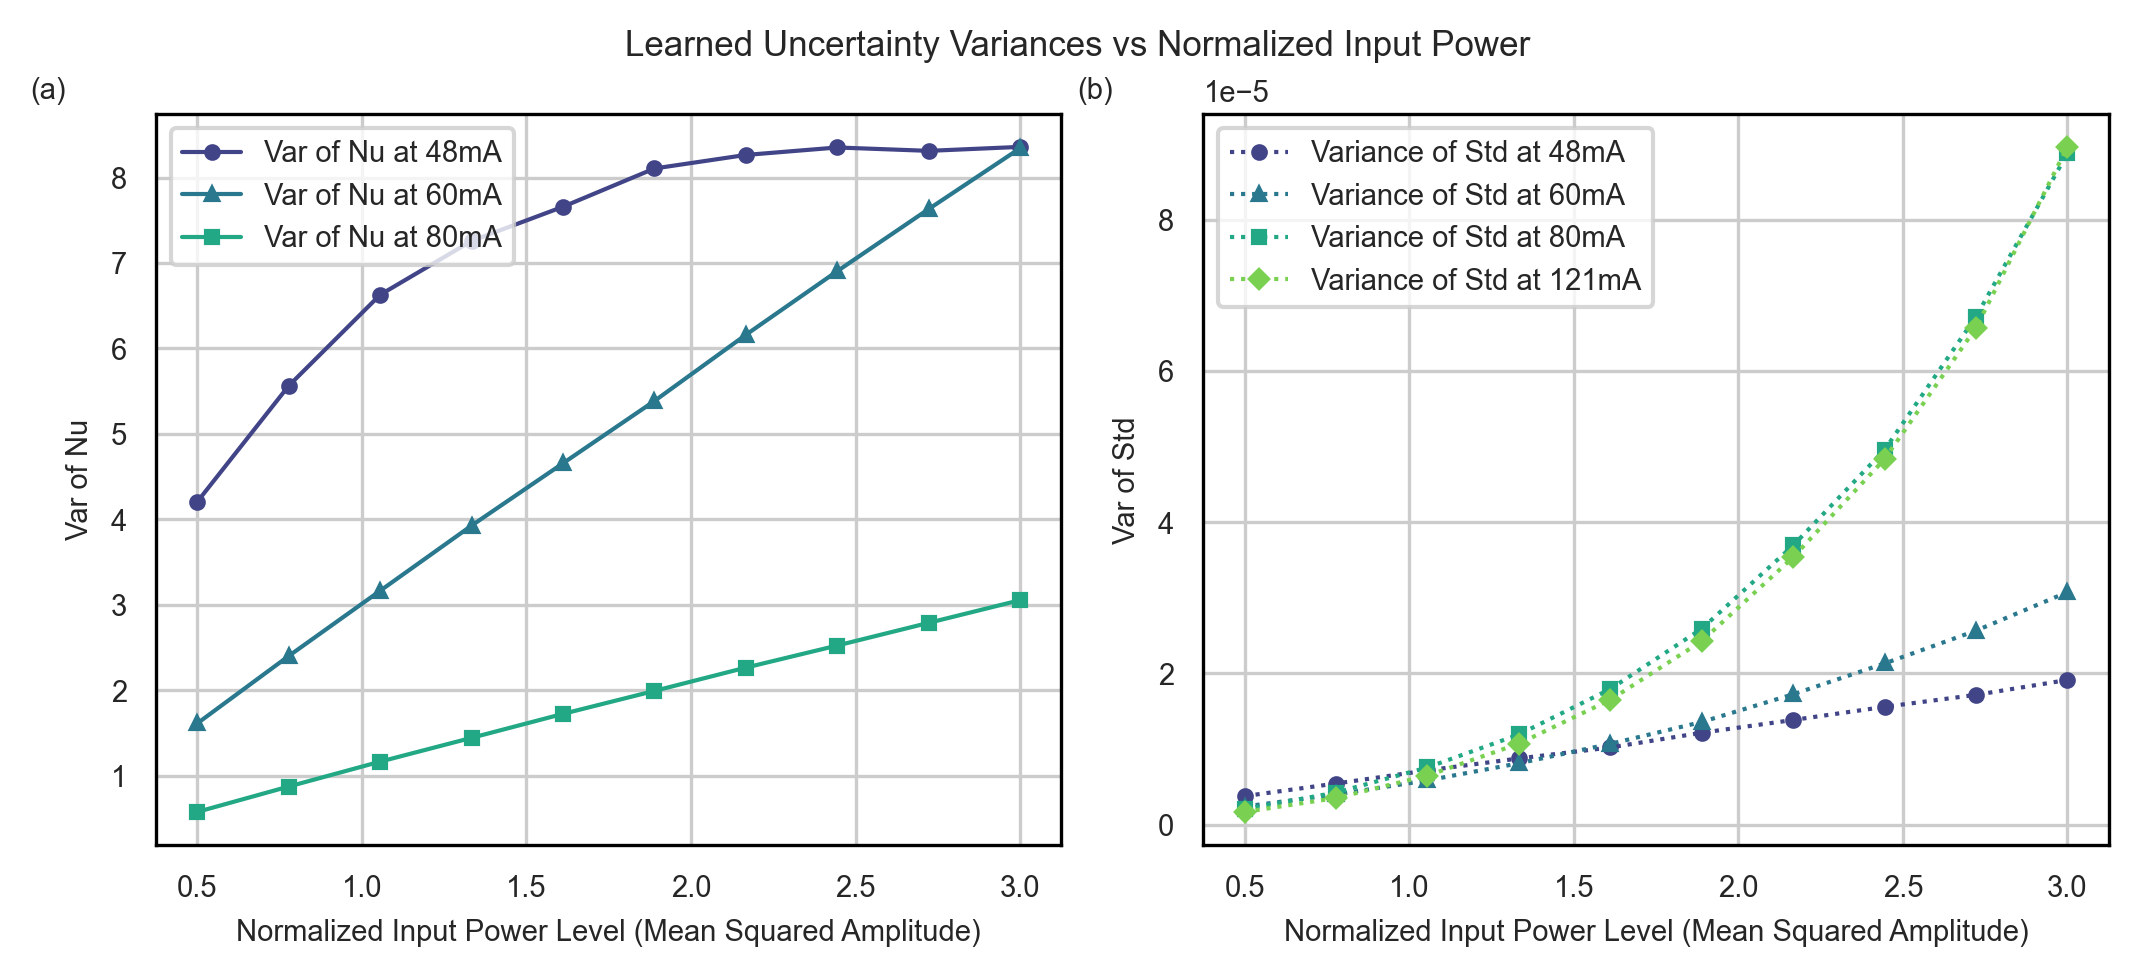

In [14]:

fig, axs = plt.subplots(1, 2, figsize=(double_fig_width, double_fig_height))

power_levels = torch.linspace(0.5, 3.0, steps=10)

current_levels = list(models.keys())
num_levels = len(current_levels)
color_palette = sns.color_palette('viridis', num_levels)
markers = ['o', '^', 's', 'D', 'p']
line_styles = ['-', ':']
for dc_bias in models.keys():
    print(f'Working on {dc_bias}. . .')
    tcn, _ = load_runs_final_artifact(models[dc_bias]['tcn_channel'], DEVICE, model_type='channel')
    std_variances = []
    if not tcn.gaussian:
        nu_variances = []


    for power in power_levels:
        input_signal = torch.randn(1000, 1000).to(DEVICE) * torch.sqrt(power)
        noisy_y_pred, y_pred_tcn, std_y_pred, nu_y_pred = tcn(input_signal)


        # Trim by 2x receptive field to avoid edge effects
        receptive_field = tcn.receptive_field
        nu_y_pred = nu_y_pred[:, receptive_field:]
        std_y_pred = std_y_pred[:, receptive_field:]

        var_nu_y_pred = torch.var(nu_y_pred, dim=-1).mean(dim=0).cpu().item()
        var_std_y_pred = torch.var(std_y_pred, dim=-1).mean(dim=0).cpu().item()
        if not tcn.gaussian:
            nu_variances.append(var_nu_y_pred)
        std_variances.append(var_std_y_pred)

    if not tcn.gaussian:
        line1, = axs[0].plot(power_levels.cpu(), nu_variances, marker=markers[current_levels.index(dc_bias)],
                        label=f'Var of Nu at {dc_bias}', color=color_palette[current_levels.index(dc_bias)],
                        linestyle=line_styles[0], markersize=3)

    line2, = axs[1].plot(power_levels.cpu(), std_variances, marker=markers[current_levels.index(dc_bias)],
                    label=f'Variance of Std at {dc_bias}', color=color_palette[current_levels.index(dc_bias)],
                    linestyle=line_styles[1], markersize=3)



# This is the key line: it hides the 1e-5 at the top
axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")
axs[0].set_ylabel('Var of Nu')
axs[0].tick_params(axis='y')
axs[1].set_ylabel('Var of Std')
axs[1].tick_params(axis='y')
fig.suptitle('Learned Uncertainty Variances vs Normalized Input Power', y=0.9)

# Add subplot labels (a, b, c)
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.05, f"({chr(97 + i)})", transform=ax.transAxes,
            fontsize=PLOT_FONT_SIZE, va='top', ha='right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
axs[0].grid(True)
axs[1].grid(True)
axs[0].set_xlabel('Normalized Input Power Level (Mean Squared Amplitude)')
axs[1].set_xlabel('Normalized Input Power Level (Mean Squared Amplitude)')
plt.savefig(
    os.path.join(PLOT_PATH, "learned_uncertainty_variances.svg"),
    format='svg',
    bbox_inches='tight',
    transparent=True
)
plt.show()

Working on 48mA. . .
Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth
Working on 60mA. . .
Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Working on 80mA. . .
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Working on 121mA. . .
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth


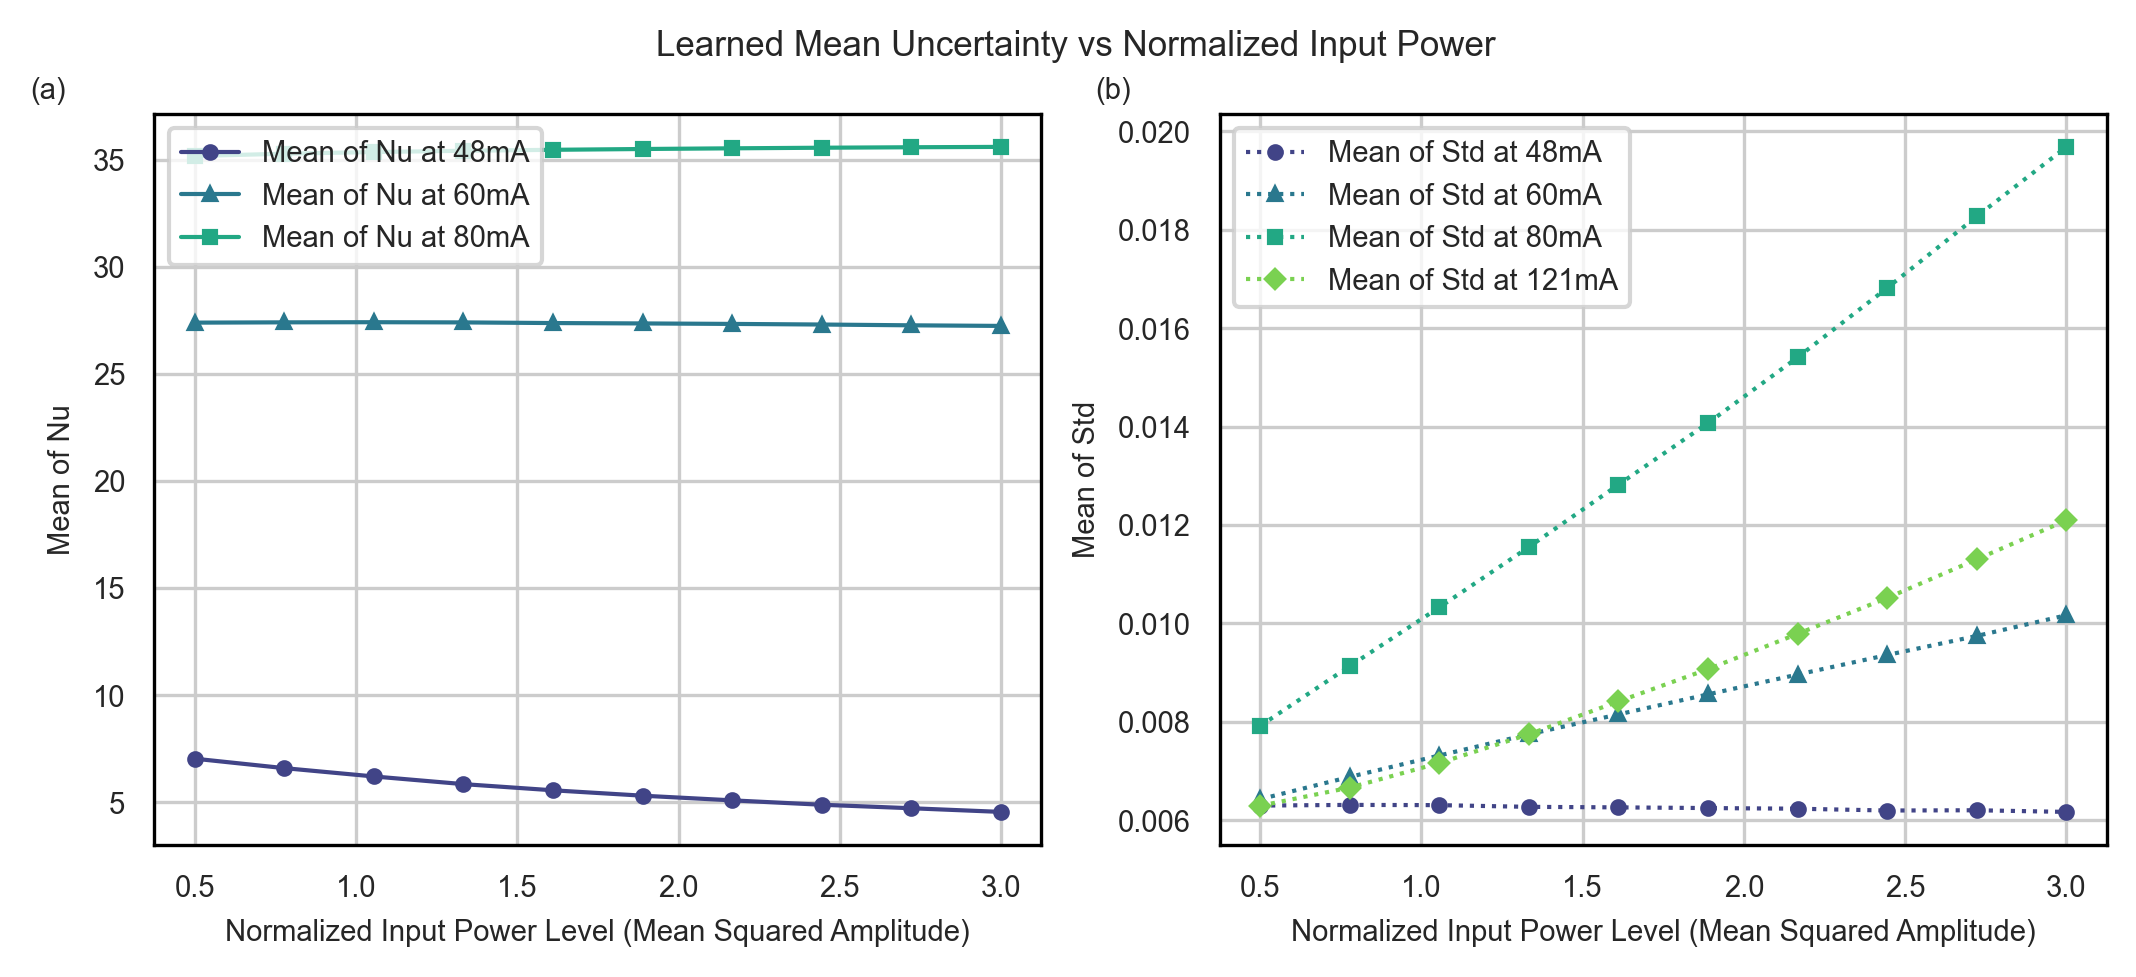

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(double_fig_width, double_fig_height))

power_levels = torch.linspace(0.5, 3.0, steps=10)

current_levels = list(models.keys())
num_levels = len(current_levels)
color_palette = sns.color_palette('viridis', num_levels)
markers = ['o', '^', 's', 'D', 'p']
line_styles = ['-', ':']
for dc_bias in models.keys():
    print(f'Working on {dc_bias}. . .')
    tcn, _ = load_runs_final_artifact(models[dc_bias]['tcn_channel'], DEVICE, model_type='channel')
    std_variances = []
    if not tcn.gaussian:
        nu_variances = []


    for power in power_levels:
        input_signal = torch.randn(1000, 1000).to(DEVICE) * torch.sqrt(power)
        noisy_y_pred, y_pred_tcn, std_y_pred, nu_y_pred = tcn(input_signal)


        # Trim by 2x receptive field to avoid edge effects
        receptive_field = tcn.receptive_field
        nu_y_pred = nu_y_pred[:, receptive_field:]
        std_y_pred = std_y_pred[:, receptive_field:]

        var_nu_y_pred = torch.mean(nu_y_pred).cpu().item()
        var_std_y_pred = torch.mean(std_y_pred).cpu().item()
        if not tcn.gaussian:
            nu_variances.append(var_nu_y_pred)
        std_variances.append(var_std_y_pred)

    if not tcn.gaussian:
        line1, = axs[0].plot(power_levels.cpu(), nu_variances, marker=markers[current_levels.index(dc_bias)],
                label=f'Mean of Nu at {dc_bias}', color=color_palette[current_levels.index(dc_bias)],
                        linestyle=line_styles[0], markersize=3)

    line2, = axs[1].plot(power_levels.cpu(), std_variances, marker=markers[current_levels.index(dc_bias)],
                    label=f'Mean of Std at {dc_bias}', color=color_palette[current_levels.index(dc_bias)],
                    linestyle=line_styles[1], markersize=3)



# This is the key line: it hides the 1e-5 at the top
axs[0].legend(loc="upper left")
axs[1].legend(loc="upper left")
axs[0].set_ylabel('Mean of Nu')
axs[0].tick_params(axis='y')
axs[1].set_ylabel('Mean of Std')
axs[1].tick_params(axis='y')
fig.suptitle('Learned Mean Uncertainty vs Normalized Input Power', y=0.9)

# Add subplot labels (a, b, c)
for i, ax in enumerate(axs):
    ax.text(-0.1, 1.05, f"({chr(97 + i)})", transform=ax.transAxes,
            fontsize=PLOT_FONT_SIZE, va='top', ha='right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
axs[0].grid(True)
axs[1].grid(True)
axs[0].set_xlabel('Normalized Input Power Level (Mean Squared Amplitude)')
axs[1].set_xlabel('Normalized Input Power Level (Mean Squared Amplitude)')
plt.savefig(
    os.path.join(PLOT_PATH, "learned_mean_uncertainty.svg"),
    format='svg',
    bbox_inches='tight',
    transparent=True
)
plt.show()

Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth
Loading from ../models\channel_models\happy-sweep-40\channel_model_final.pth
Loading from ../models\channel_models\classic-sweep-27\channel_model_final.pth
Loading from ../models\channel_models\rural-sweep-18\channel_model_final.pth


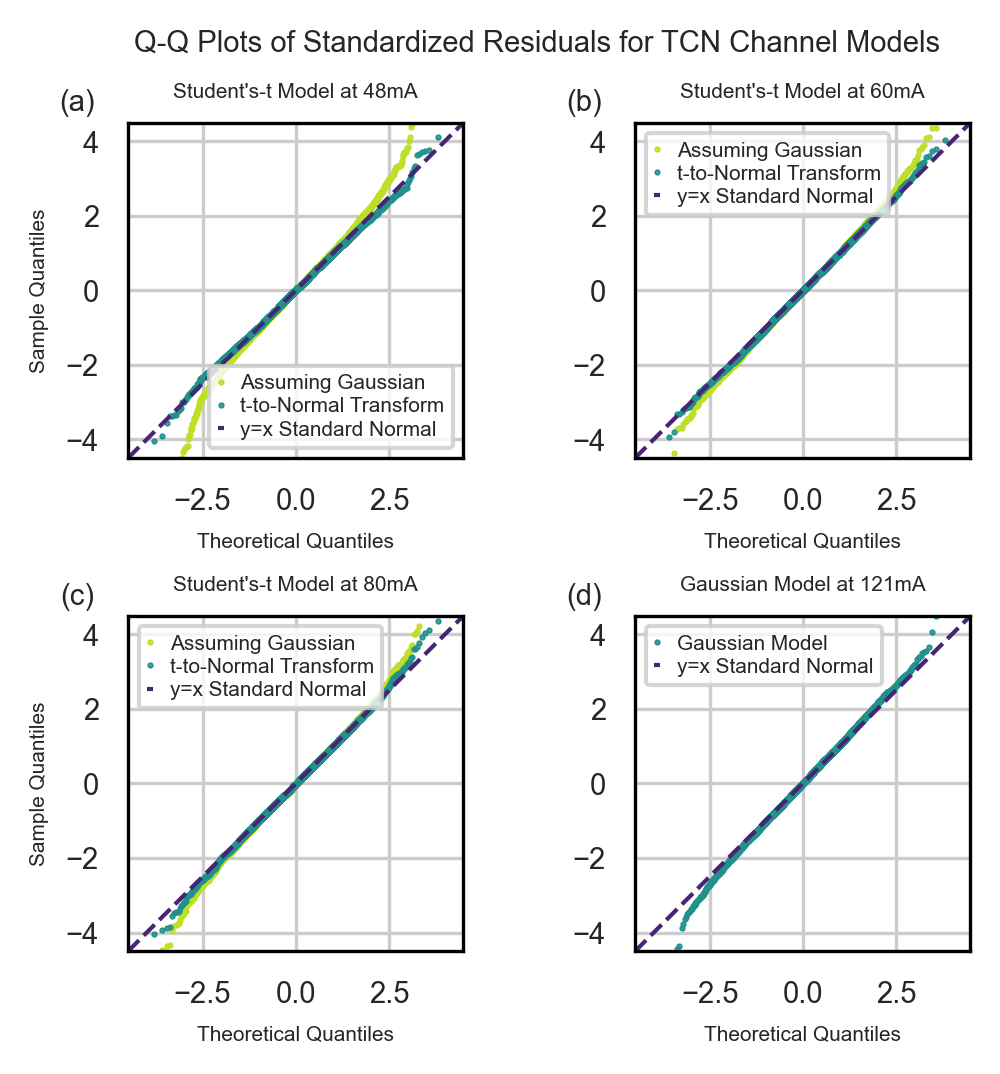

In [16]:
fig, axs =plt.subplots(2, 2, figsize=(fig_width, fig_height), constrained_layout=True)
plt.suptitle("Q-Q Plots of Standardized Residuals for TCN Channel Models", fontsize=PLOT_FONT_SIZE)
axes = (axs[0,0], axs[0,1], axs[1,0], axs[1,1])
iter = 0
for (dc_bias, ax) in zip(models.keys(), axes):
    tcn, _ = load_runs_final_artifact(models[dc_bias]['tcn_channel'], DEVICE, model_type='channel')
    ofdm_info = models[dc_bias]['ofdm_info']

    # If model is Gaussian, plot Q-Q plot of residuals. Otherwise, for the Student's-t
    # model, we need to do a probability integral transform to get to a Gaussian using the CDF


    X, Y = ofdm_info.sent_frames_time, ofdm_info.received_frames_time
    y_pred_noisy, y_pred_mean, y_pred_std, nu = tcn(X)

    # collect residuals
    r = (Y - y_pred_mean) / y_pred_std

    # trim by receptive field
    r = r[:, tcn.receptive_field:].detach().cpu().numpy().flatten()

    nu = nu[:, tcn.receptive_field:].detach().cpu().numpy().flatten()

    # truncate to smaller amount for computational feasibility
    N = r.shape[0]
    MAX_SAMPLES = 10000
    indices = torch.randperm(N)[:MAX_SAMPLES]
    r = r[indices]
    nu = nu[indices]
    if tcn.gaussian:
        (osm, osr), _ = stats.probplot(r, dist="norm")
        ax.plot(osm, osr, marker='.', linestyle='none', color=cmap(0.5), label='Gaussian Model', rasterized=True, markersize=1)
        ax.plot([-4.5, 4.5], [-4.5, 4.5], color=cmap(0.1), linestyle='--', label='y=x Standard Normal')
        ax.set_xlim([-4.5, 4.5])
        ax.set_ylim([-4.5, 4.5])
        ax.set_title(f"Gaussian Model at {dc_bias}", fontsize=SMALL_PLOT_FONT_SIZE)
        ax.set_xlabel("Theoretical Quantiles", fontsize=SMALL_PLOT_FONT_SIZE)
        if iter % 2 != 0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Sample Quantiles", fontsize=SMALL_PLOT_FONT_SIZE)
        ax.grid(True)
        ax.set_box_aspect(1)
        ax.legend(fontsize=SMALL_PLOT_FONT_SIZE,
            handlelength=0.3,
            labelspacing=0.2)
    else:

        # Also plot assuming just gaussian for comparison
        (osm, osr), _ = stats.probplot(r, dist="norm")
        ax.plot(osm, osr, marker='.', linestyle='none', color=cmap(0.9), label='Assuming Gaussian', markersize=1, rasterized=True)

        ax.grid(True)

        # For Student's-t, do probability integral transform
        cdf_values = stats.t.cdf(r, df=nu)
        transformed_residuals = stats.norm.ppf(cdf_values) # Transform to standard normal using inverse CDF of normal
        (osm, osr), _ = stats.probplot(transformed_residuals, dist="norm")



        ax.plot(osm, osr, marker='.', linestyle='none', color=cmap(0.5), label='t-to-Normal Transform', rasterized=True, markersize=1)
        ax.plot([-4.5, 4.5], [-4.5, 4.5], color=cmap(0.1), linestyle='--', label='y=x Standard Normal')
        ax.set_xlim([-4.5, 4.5])
        ax.set_ylim([-4.5, 4.5])
        ax.set_title(f"Student's-t Model at {dc_bias}", fontsize=SMALL_PLOT_FONT_SIZE)
        ax.set_xlabel("Theoretical Quantiles", fontsize=SMALL_PLOT_FONT_SIZE)
        ax.legend(fontsize=SMALL_PLOT_FONT_SIZE,
            handlelength=0.3,
            labelspacing=0.2)
        if iter % 2 != 0:
            ax.set_ylabel("")
        else:
            ax.set_ylabel("Sample Quantiles", fontsize=SMALL_PLOT_FONT_SIZE)
        ax.set_box_aspect(1)



    iter += 1

    # Add subplot labels (a, b, c)


for i, ax in enumerate(axes):
    ax.text(-0.1, 1.1, f"({chr(97 + i)})", transform=ax.transAxes,
            fontsize=PLOT_FONT_SIZE, va='top', ha='right')
plt.savefig(
    os.path.join(PLOT_PATH, "qq_plots_residuals.svg"),
    format='svg',
    bbox_inches='tight',
    transparent=True,
    dpi=300
)
plt.show()

Loading from ../models\channel_models\comfy-sweep-115\channel_model_final.pth


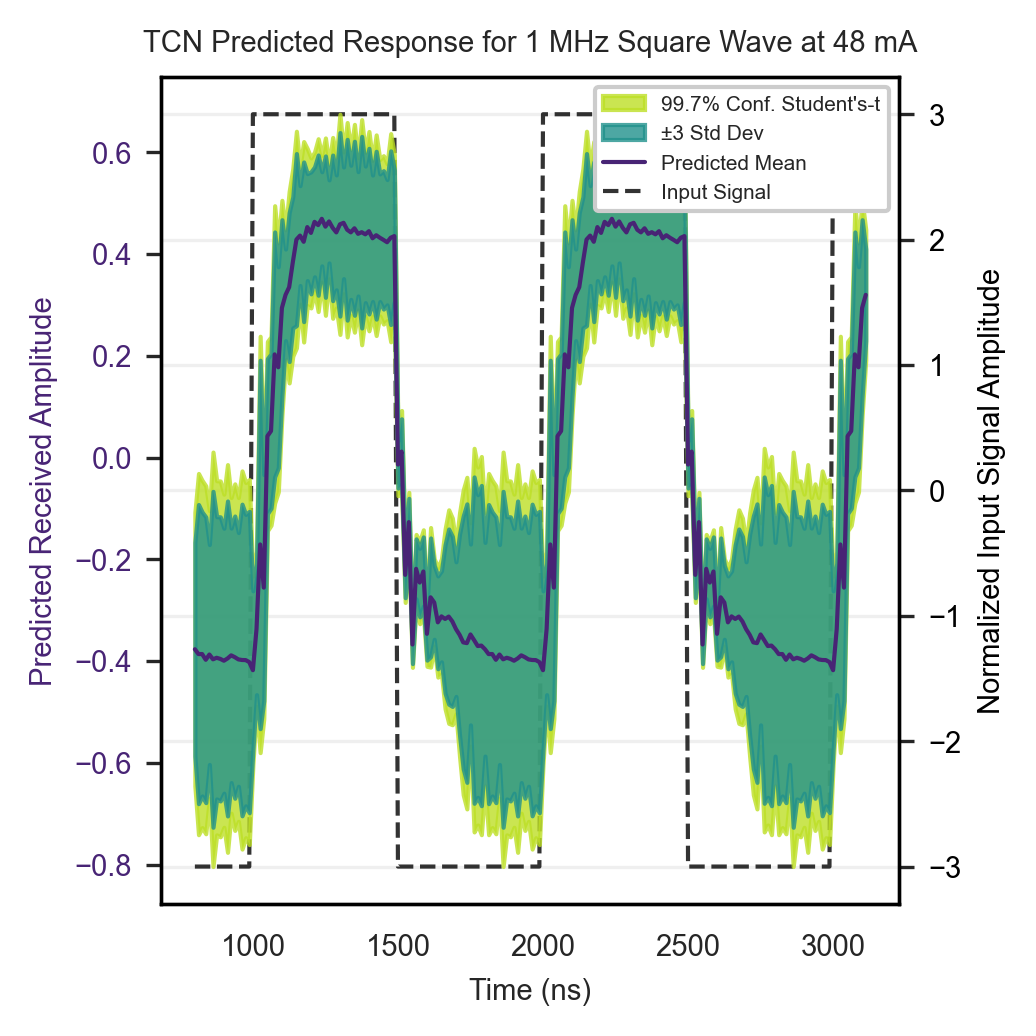

In [17]:
# Visual demonstration of the dynamic predicted mean/std over time
ts = torch.linspace(0, 1, 8000)
def freq_t(t):
    return (30) + (729) * t

example_tcn, _ = load_runs_final_artifact(models['48mA']['tcn_channel'], DEVICE, model_type='channel')
receptive_field = example_tcn.receptive_field
window = [receptive_field, 250]
seconds_per_sample = 1e-4 / 8000  # 0.1 ms over 8000 samples
nano_seconds_per_sample = seconds_per_sample * 1e9
fs = 1 / seconds_per_sample  # Sampling frequency in Hz
sample_times_in_ns = torch.arange(0, len(ts)) * nano_seconds_per_sample

# Square wave pulse train
pulse_freq = 100
x_test = torch.sign(torch.sin(2 * torch.pi * pulse_freq * ts))

min_amplitude = -3
max_amplitude = 3

x_test = ((x_test.to(DEVICE) + 1.0) / 2.0) * (max_amplitude - min_amplitude) + min_amplitude
x_test = x_test.unsqueeze(0)

with torch.no_grad():
    noisy_y_pred, y_pred_mean, y_pred_std, nu = example_tcn(x_test)
    y_pred_mean = y_pred_mean.squeeze(0).cpu()
    y_pred_std = y_pred_std.squeeze(0).cpu()

receptive_field = example_tcn.receptive_field



fig, ax1 = plt.subplots(figsize=(fig_width, fig_height))

tail_low, tail_high = stats.t.interval(0.997, nu.squeeze().cpu().numpy(), 
                                       loc=y_pred_mean.numpy(), 
                                       scale=y_pred_std.numpy())
# Plot the Heavy Tails (Student's-t)
ax1.fill_between(
    sample_times_in_ns[window[0]:window[1]],
    tail_low[window[0]:window[1]],
    tail_high[window[0]:window[1]],
    color=cmap(0.9), alpha=0.8, label="99.7% Conf. Student's-t"
)

# Plot Gaussian Core (±3 Std Dev)
ax1.fill_between(
    sample_times_in_ns[window[0]:window[1]],
    (y_pred_mean - 3 * y_pred_std)[window[0]:window[1]],
    (y_pred_mean + 3 * y_pred_std)[window[0]:window[1]],
    color=cmap(0.5), alpha=0.8, label='±3 Std Dev'
)

# Plot Predicted Mean
line1, = ax1.plot(sample_times_in_ns[window[0]:window[1]], 
                  y_pred_mean[window[0]:window[1]], 
                  label='Predicted Mean', color=cmap(0.1))

ax1.set_xlabel("Time (ns)")
ax1.set_ylabel("Predicted Received Amplitude", color=cmap(0.1))
ax1.tick_params(axis='y', labelcolor=cmap(0.1))
ax1.grid(True, alpha=0.8, zorder=0)
ax1.set_zorder(1)            
ax1.patch.set_visible(False) 
ax1.set_axisbelow(True)


ax1.grid(False)
ax1.set_zorder(1)
ax1.patch.set_visible(False) 

ax2 = ax1.twinx()
ax2.set_zorder(0)

ax2.grid(True, alpha=0.3)
ax2.set_axisbelow(True)
line2, = ax2.plot(sample_times_in_ns[window[0]:window[1]], 
                  x_test.squeeze(0).cpu()[window[0]:window[1]], 
                  label='Input Signal', color='black', linestyle='--', alpha=0.8)

ax2.set_ylabel("Normalized Input Signal Amplitude", color='black')
ax2.tick_params(axis='y', labelcolor='black')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Combine them and place in a single legend box
ax1.legend(h1 + h2, l1 + l2, loc='upper right', frameon=True, fontsize=SMALL_PLOT_FONT_SIZE, framealpha=1, facecolor='white').set_zorder(10)

plt.title("TCN Predicted Response for 1 MHz Square Wave at 48 mA")
fig.tight_layout()
plt.savefig(
    os.path.join(PLOT_PATH, "tcn_predicted_mean_std.svg"),
    format='svg',
    bbox_inches='tight',
    transparent=True,
    dpi=300
)
plt.show()